## This script contains:
### 1. Import of Libraries and datasets
### 2. Applying elbow technique
#### Creating clusters column
#### Creating cluster column based on color

## 1.Import of Libraries and datasets

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl

In [4]:
%matplotlib inline

In [5]:
# Importing Dataset
df=pd.read_csv(r'/Users/navneetjha/Desktop/Career foundry Docs/exercises/Data Immersion /Achievement 6/Exercises/Dataset/gun_violence_year_on_year',index_col=False)

In [6]:
df_wrangled=pd.read_csv(r'/Users/navneetjha/Desktop/Career foundry Docs/exercises/Data Immersion /Achievement 6/Exercises/Dataset/gun_violence_wrangled',index_col=False)

In [7]:
df.head()

,date,state,n_killed,n_injured,age_group,gender,status,year,month,day
0,2013-01-01,Ohio,1,3,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",2013,1,1
1,2013-01-07,North Carolina,2,2,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Injured||1::Injured||2::Killed||3::Killed,2013,1,7
2,2013-01-19,New Mexico,5,0,0::Adult 18+||1::Adult 18+||2::Child 0-11||3::...,0::Male||1::Female||2::Male||3::Female||4::Fem...,0::Killed||1::Killed||2::Killed||3::Killed||4:...,2013,1,19
3,2013-01-23,Tennessee,1,3,0::Adult 18+,0::Male||1::Male||2::Male||3::Male,0::Killed||1::Injured||2::Injured||3::Injured,2013,1,23
4,2013-01-25,Missouri,1,3,0::Adult 18+,0::Male,0::Killed||1::Injured||2::Injured||3::Injured,2013,1,25


In [8]:
df.shape

(45403, 10)

In [9]:
# Extracting relevent columms for analysis
columns=['state','n_killed','n_injured','year','month','day']

In [10]:
df_2=df[columns]

In [11]:
df_2.head()

,state,n_killed,n_injured,year,month,day
0,Ohio,1,3,2013,1,1
1,North Carolina,2,2,2013,1,7
2,New Mexico,5,0,2013,1,19
3,Tennessee,1,3,2013,1,23
4,Missouri,1,3,2013,1,25


In [12]:
df_2.shape

(45403, 6)

In [13]:
# Checking null values
df_2.isnull().sum()

state        0
n_killed     0
n_injured    0
year         0
month        0
day          0
dtype: int64

# 2. Applying elbow technique

In [15]:
# Extracting relevant columns
columns_2=['n_killed','n_injured','year','month','day']
df_5=df[columns_2]

In [16]:
df_5.head()

,n_killed,n_injured,year,month,day
0,1,3,2013,1,1
1,2,2,2013,1,7
2,5,0,2013,1,19
3,1,3,2013,1,23
4,1,3,2013,1,25


In [17]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl]# Defines k-means clusters in the range assigned above.

In [18]:
# Creating a score that represents a rate of variation for the given cluster option.
score = [kmeans[i].fit(df_5).score(df_5) for i in range(len(kmeans))] 

score

/opt/anaconda3/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the valu

[-4237981.427747078,
 -1580374.7753870941,
 -1082483.340987301,
 -908163.040304678,
 -763993.9361111126,
 -628335.3345035748,
 -524110.2346345081,
 -457610.4942276286,
 -408925.8644196836]

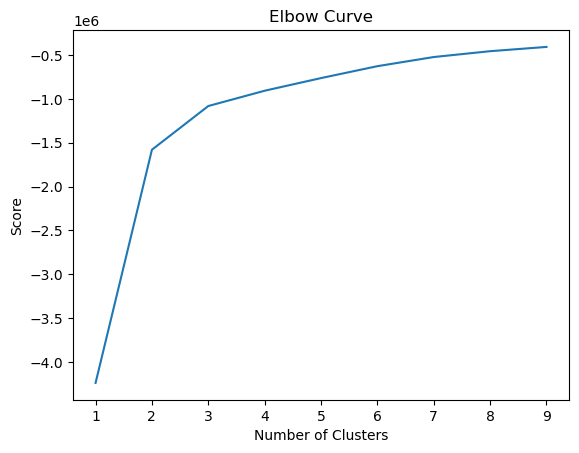

In [19]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

The above line chart shows that the majority of the data are clusters into three sections and after third section it doesnot have a clear segmentation.

In [21]:
# Creating the k-means object.

kmeans = KMeans(n_clusters = 3)

In [22]:
# Fit the k-means object to the data.

kmeans.fit(df_5)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

## Creating clusters column

In [24]:
df_5['clusters'] = kmeans.fit_predict(df_5)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/38/3t8_0dvn1h950p6h5yqb56rm0000gn/T/ipykernel_7412/1466408029.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_5['clusters'] = kmeans.fit_predict(df_5)


In [25]:
df_5.head()

,n_killed,n_injured,year,month,day,clusters
0,1,3,2013,1,1,0
1,2,2,2013,1,7,0
2,5,0,2013,1,19,2
3,1,3,2013,1,23,1
4,1,3,2013,1,25,1


In [26]:
#counting values of different clusters
df_5['clusters'].value_counts()

clusters
1    15893
2    14955
0    14555
Name: count, dtype: int64

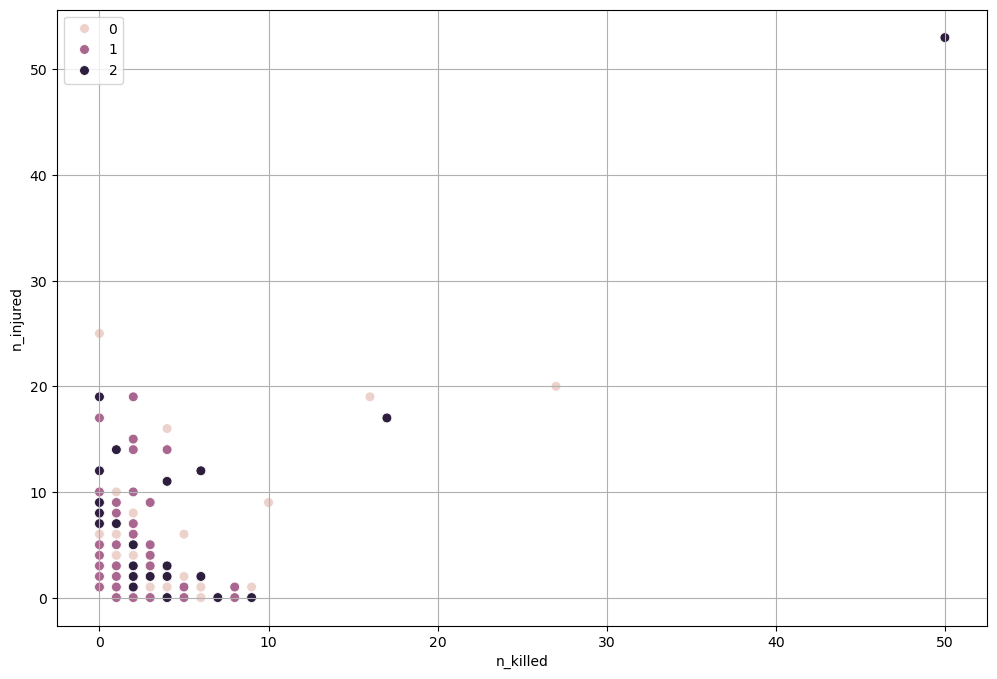

In [27]:
# Plotting the clusters for the "n_killed" and "n_injured" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_5['n_killed'], y=df_5['n_injured'], hue=kmeans.labels_, s=50) 
# Subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points we want to see in the plot.

ax.grid(True) # This adds the grid from the background.
plt.xlabel('n_killed') # Label x-axis.
plt.ylabel('n_injured') # Label y-axis.
plt.show()

The chart shows that except few cases largely the victims of gun violence are in single digits. Most of the cases fall in purple cluster number 1. 

## Creating cluster column based on color

In [29]:
# Creating cluster column
df_5.loc[df_5['clusters'] == 2, 'cluster'] = 'dark purple'
df_5.loc[df_5['clusters'] == 1, 'cluster'] = 'purple'
df_5.loc[df_5['clusters'] == 0, 'cluster'] = 'pink'

/var/folders/38/3t8_0dvn1h950p6h5yqb56rm0000gn/T/ipykernel_7412/1144161864.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_5.loc[df_5['clusters'] == 2, 'cluster'] = 'dark purple'


In [30]:
# Finding aggregate values of cluster column
df_5.groupby('cluster').agg({'n_killed':['mean', 'median'], 
                         'n_injured':['mean', 'median'], 
                         'year':['mean', 'median'],
                          'month':['mean', 'median'],
                          'day':['mean','median']})

n_killed        n_injured                year             month  \
                 mean median      mean median         mean  median      mean   
cluster                                                                        
dark purple  0.539151    0.0  0.737412    1.0  2016.442260  2017.0  6.445135   
pink         0.551563    0.0  0.738715    1.0  2016.451460  2017.0  6.417726   
purple       0.537721    0.0  0.754106    1.0  2016.408167  2017.0  6.650978   

                          day         
            median       mean median  
cluster                               
dark purple    7.0  15.531327   16.0  
pink           7.0   5.426451    5.0  
purple         7.0  25.795759   26.0

OBSERVATIONS:
1. Majority of the killings and injuries from firearms is in the purple cluster.
2. Deadliest year for gun killings - 2017 and then 2016
3. Deadliest month for gun killings across all clusters -- July followed by June
4. Deadliest time of the month for gun killings - 26th of the month or end of the month
5. One person is definetely injured if not killed in all the gun violence.

Further analysis could focus on the other columns like the charactericts of the killing where one can find the nature of gun violence. It will be thoughtful to see whether the killings are in the form of suicide or something else, and analyse more on why the month of July and June see large number of gun violence. Is it due of financial reason or if the number of deaths and injured are of college going students or recent graduates, is it due to job insecurity or depression? Future analysis of the project will focus on these aspects. 